<h4 style="background-color: #80c4e6; display: flex; padding: 0.5em; color: #000;">
    NASA Breath Diagnosmtics Challenge
</h4>

##### 1 - Data Exploration and Preparation

In [1]:
# general setup
import os, glob, sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# model setup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# utils setup
current_directory = os.getcwd()
root_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
sys.path.append(root_directory)

# custom utils
from utils.io import ENoseIO

##### 2 - Read and Load Data

In [2]:
train_files = glob.glob('../dataset/train/*.txt')
test_files  = glob.glob('../dataset/test/*.txt')
train_data  = pd.concat([ENoseIO.read_patient_data(f) for f in train_files])
test_data   = pd.concat([ENoseIO.read_patient_data(f, is_labeled=False) for f in test_files])

##### 3 - Data Exploration

In [3]:
# Display some basic information about the dataset
#print("Train Data Info")
#print(train_data.info())
#print("Test Data Info")
#print(test_data.info())

# Display the first few rows of the training data
print("Train Data Sample")
train_data

Train Data Sample


,Min:Sec,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D57,D58,D59,D60,D61,D62,D63,D64,Patient_ID,Result
0,07:29.6,9934.068034,1493.775934,695.734215,1274.504328,10810.90837,1501.151543,57410.52632,2011158.375,710.478301,...,836.833188,12150.26004,302148.8224,23528.25517,22332.09609,18073.57374,108110.7166,770474.7984,21,POSITIVE
1,07:31.8,9938.208689,1493.775934,696.158250,1274.903259,10836.83381,1501.704284,57422.80702,2014549.041,711.651245,...,838.245110,12148.76342,302083.1378,23550.83018,22341.90069,18060.17640,108148.6333,770639.8227,21,POSITIVE
2,07:34.1,9935.979106,1488.842785,695.204173,1260.461962,10768.57443,1495.808383,57307.01754,1984772.825,711.694687,...,835.575294,12151.75665,302186.3564,23503.49548,22206.03684,18074.13196,108079.6939,769909.0009,21,POSITIVE
3,07:36.4,9922.283093,1482.803135,692.829581,1249.132325,10680.29667,1483.417780,56922.80702,1937919.980,700.073852,...,834.728141,12138.66128,302270.8079,23487.47451,22190.62960,18056.82706,107941.8152,769060.3046,21,POSITIVE
4,07:38.6,9922.920117,1481.097280,691.833100,1242.071249,10672.42058,1478.949793,56750.87719,1918192.467,694.534949,...,834.137701,12147.26681,302120.6719,23471.45354,22370.61419,18051.80306,107907.3455,768824.5556,21,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,15:14.0,10048.343660,1499.674085,816.511726,1268.171431,12080.84824,1517.008055,58212.28070,2160574.580,724.148115,...,835.951591,12190.64047,312401.5174,25000.00000,23329.27386,18766.31010,108586.1960,779580.6169,38,POSITIVE
372,15:16.3,10048.668120,1499.580967,816.223292,1267.650243,11984.75812,1516.639816,58203.50877,2160061.562,723.489323,...,836.212981,12205.26474,312343.1573,24986.75600,23286.64941,18739.86129,108547.5194,779191.3983,38,POSITIVE
373,15:18.5,10048.668120,1499.394729,815.934858,1268.011065,12166.99801,1516.179517,58203.50877,2160831.089,723.875511,...,835.794756,12219.51402,312294.5239,24986.75600,23317.09545,18754.55507,108533.4552,778996.7889,38,POSITIVE
374,15:20.8,10052.561570,1499.627526,815.823922,1267.690334,11905.23526,1516.962025,58212.28070,2161921.252,723.966379,...,835.951591,12201.13994,312255.6172,24981.30259,23167.14873,18748.08981,108508.8429,779094.0936,38,POSITIVE


In [4]:
print("Test Data Sample")
test_data.head()

Test Data Sample


,Min:Sec,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D56,D57,D58,D59,D60,D61,D62,D63,D64,Patient_ID
0,00:12.0,10324.82138,1528.838038,798.045294,1351.027756,11098.56649,15490.37149,5936.426889,2215087.532,7998.689416,...,67452743.90,898.704877,12315.35490,335119.9751,28650.15480,26016.61820,20059.41329,119113.9720,857668.3570,34
1,00:14.2,10326.14448,1529.119385,799.820148,1352.660443,11122.17318,15502.14229,5940.202442,2217960.711,8004.271534,...,62868902.44,898.759989,12309.29475,335255.0119,28685.53737,26198.58745,20056.93774,119110.1855,857983.6570,34
2,00:16.5,10327.46758,1527.196849,799.749154,1350.064889,11123.54169,15504.49645,5943.618418,2211746.626,7990.194889,...,60503048.78,898.098650,12309.29475,335327.7241,28664.30783,26212.71292,20074.88551,119079.8940,857694.6320,34
3,00:18.8,10305.30564,1515.614743,782.828880,1332.607695,11009.95587,15315.69283,5888.962802,2151142.590,7937.286120,...,65679878.05,897.850648,12301.71957,335171.9123,28624.50243,26024.09639,20059.41329,118958.7278,856617.3573,34
4,00:21.1,10299.68246,1512.426146,777.575313,1316.908779,11000.71846,15235.65140,5866.669064,2122410.798,7863.505085,...,62397865.85,897.492422,12311.94606,335140.7500,28604.15745,26230.16203,20069.93440,118920.8633,855724.0075,34


In [5]:
# Count of POSITIVE and NEGATIVE cases
print("Train Data Result Distribution")
print(train_data['Result'].value_counts())

Train Data Result Distribution
Result
NEGATIVE    9881
POSITIVE    7130
Name: count, dtype: int64


#### 4 - Data Preprocessing

In [6]:
# Convert 'Result' to binary format (1 for POSITIVE, 0 for NEGATIVE)
train_data['Result'] = train_data['Result'].apply(lambda x: 1 if x == 'POSITIVE' else 0)

# Drop 'Min:Sec' column as it is not useful for training
X = train_data.drop(columns=['Min:Sec', 'Result'])
y = train_data['Result']
#train_patient_id = train_data['Patient_ID']
X_test = test_data.drop(columns=['Min:Sec', 'Patient_ID'])
test_patient_id = test_data['Patient_ID']

# Train-Val split
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.01, stratify=y, random_state=42)
X_train = X
y_train = y
X_val = X
y_val = y

train_patient_id = X_train['Patient_ID']
X_train = X_train.drop(columns=['Patient_ID'])
val_patient_id = X_val['Patient_ID']
X_val = X_val.drop(columns=['Patient_ID'])

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.fit_transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [7]:
X_train.shape

(17011, 64)

##### 5 - Model Training

In [8]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

##### 6 - Model Evaluation

In [9]:
def mean_decision_formater(patient_ids, line_predictions, y_true=None):
    if y_true is not None:
        df = pd.DataFrame({'patient_id': patient_ids, 'y_pred': line_predictions, 'y_true': y_true})
    else:
        df = pd.DataFrame({'patient_id': patient_ids, 'y_pred': line_predictions})

    # Group by val_patient_id
    grouped = df.groupby('patient_id')

    # Compute the mean of y_pred and take the first value of y_true for each group
    reduced_y_pred = grouped['y_pred'].mean().values
    reduced_y_true = grouped['y_true'].first().values if y_true is not None else None
    patient_ids_grouped = grouped['patient_id'].first().values

    return (patient_ids_grouped, reduced_y_pred, reduced_y_true)

In [10]:
# Make predictions on the validation set
y_pred = model.predict(X_val_scaled)
patient_ids, y_pred_, y_val_ = mean_decision_formater(val_patient_id, y_pred, y_val)
y_pred_ = (y_pred_ > 0.5).astype(int)

Accuracy: 100.00%


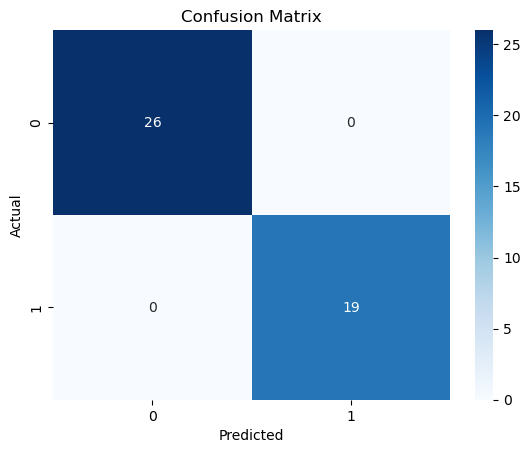

In [11]:

# Calculate accuracy
accuracy = accuracy_score(y_val_, y_pred_)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_val_, y_pred_)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##### 7 - Feature Importance

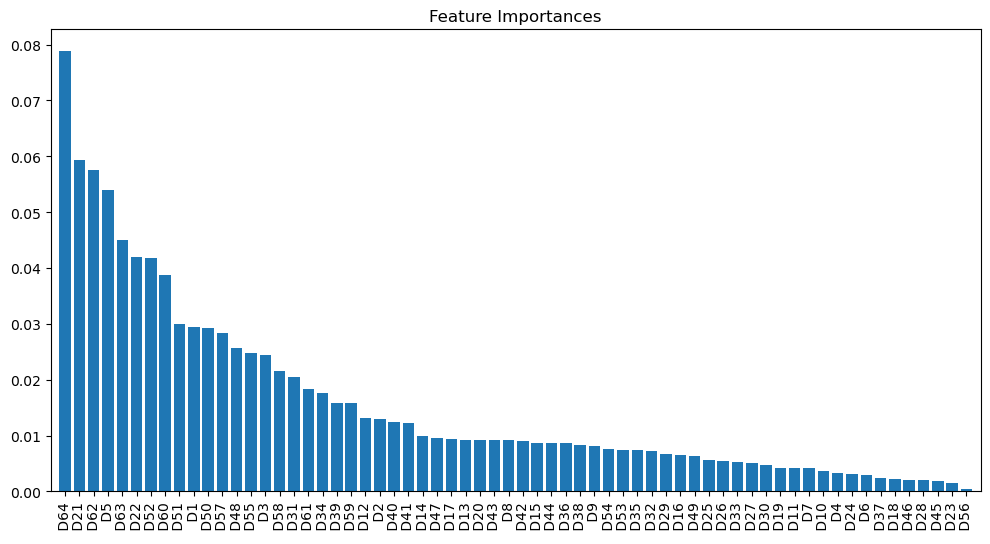

In [12]:
# Plot feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [13]:
train_data.shape

(17011, 67)

<h4 style="background-color: #80c4e6; display: flex; padding: 0.5em; color: #000;">
    Prediction on testset
</h4>

In [14]:
y_test_pred = model.predict(X_test_scaled)
test_patient_ids, y_test_pred_, _ = mean_decision_formater(test_patient_id, y_test_pred, y_true=None)
y_test_pred_ = (y_test_pred_ > 0.5).astype(int)

In [15]:
y_test_pred_

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1])

* **Save results**

In [17]:
ENoseIO.save_predictions_to_csv(y_test_pred_)

Saved predictions to submissions/submission_2.csv
